In [4]:
import pandas as pd


In [3]:

# Load the CSV file into a DataFrame
df = pd.read_csv('Filtered TCC Data.csv')

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())



C:\Users\hikou\AppData\Local\Temp\ipykernel_15616\2309573993.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Filtered TCC Data.csv')



Summary Statistics:
         Unnamed: 0         GEOID           pid      repostid           beds  \
count  1.419040e+05  1.419040e+05  1.419040e+05  5.205400e+04  120858.000000   
mean   6.621817e+06  6.045847e+09  7.266412e+09  6.962426e+09       1.989707   
std    3.522970e+06  2.058009e+07  1.859708e+08  7.592757e+08       1.031076   
min    6.000000e+00  6.019000e+09  6.952358e+09  1.564667e+09       0.000000   
25%    3.685073e+06  6.037105e+09  7.078364e+09  6.958960e+09       1.000000   
50%    7.002532e+06  6.037122e+09  7.326561e+09  7.181145e+09       2.000000   
75%    9.471854e+06  6.071001e+09  7.444873e+09  7.426838e+09       3.000000   
max    1.261003e+07  6.077002e+09  7.554511e+09  7.542878e+09       8.000000   

               sqft            lat            lng       accuracy  \
count  9.518000e+04  141904.000000  141904.000000  141904.000000   
mean   1.080881e+03      34.705587    -118.423026      14.003242   
std    6.110349e+03       1.100697       0.804754     

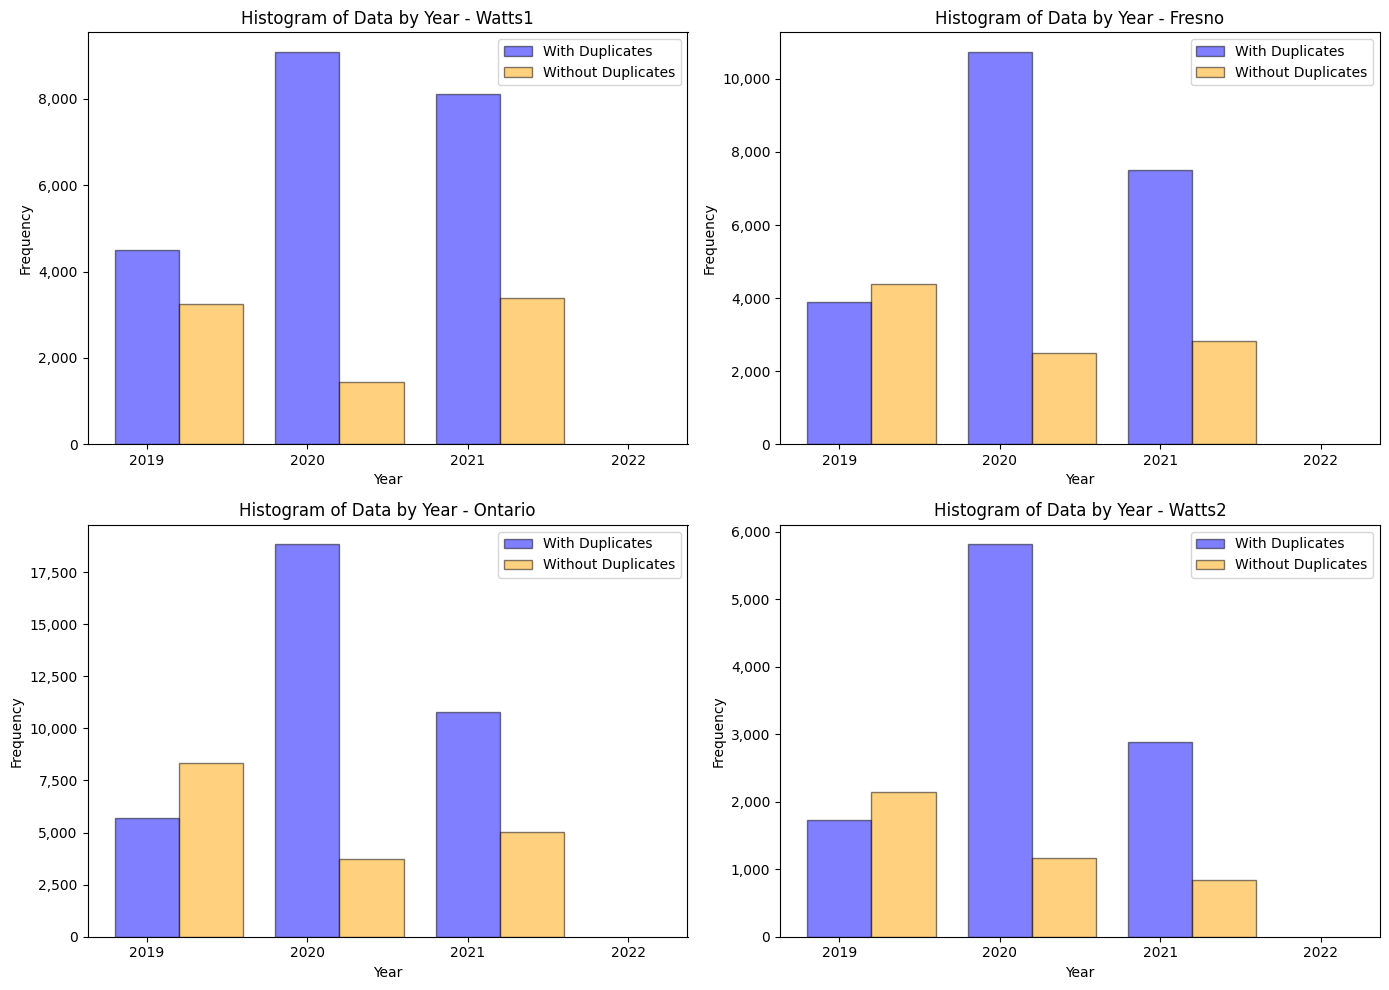

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df and df_no_duplicates are already defined

# Get unique regions
unique_regions = df['region'].dropna().unique()

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define bins and width for histograms
bins = range(df['year'].min(), df['year'].max() + 1)
width = 0.4

# Plot side-by-side bar charts for each region
for i, region in enumerate(unique_regions):
    region_data_with_duplicates = df[df['region'] == region]
    region_data_without_duplicates = df_no_duplicates[df_no_duplicates['region'] == region]
    
    region_years_with_duplicates = region_data_with_duplicates['year']
    region_years_without_duplicates = region_data_without_duplicates['year']
    
    # Plot histograms side-by-side
    axes[i].hist(region_years_with_duplicates, bins=[x - width/2 for x in bins], alpha=0.5, label='With Duplicates', color='blue', edgecolor='black', width=width)
    axes[i].hist(region_years_without_duplicates, bins=[x + width/2 for x in bins], alpha=0.5, label='Without Duplicates', color='orange', edgecolor='black', width=width)
    
    # Set titles and labels
    axes[i].set_title(f'Histogram of Data by Year - {region}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    
    # Format y-axis with commas
    axes[i].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
    # Set x-axis to show whole numbers
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Adjust layout
plt.tight_layout()
plt.show()

     Region  Year  With Duplicates  Without Duplicates
0    Watts1  2019             4493                1311
1    Watts1  2020             9088                3259
2    Watts1  2021             8109                1450
3    Watts1  2022            25669                3382
4    Fresno  2019             3891                1516
5    Fresno  2020            10737                4381
6    Fresno  2021             7509                2497
7    Fresno  2022             6678                2827
8   Ontario  2019             5695                2480
9   Ontario  2020            18827                8316
10  Ontario  2021            10770                3752
11  Ontario  2022            10683                5026
12   Watts2  2019             1733                 725
13   Watts2  2020             5814                2146
14   Watts2  2021             2882                1164
15   Watts2  2022             2043                 834


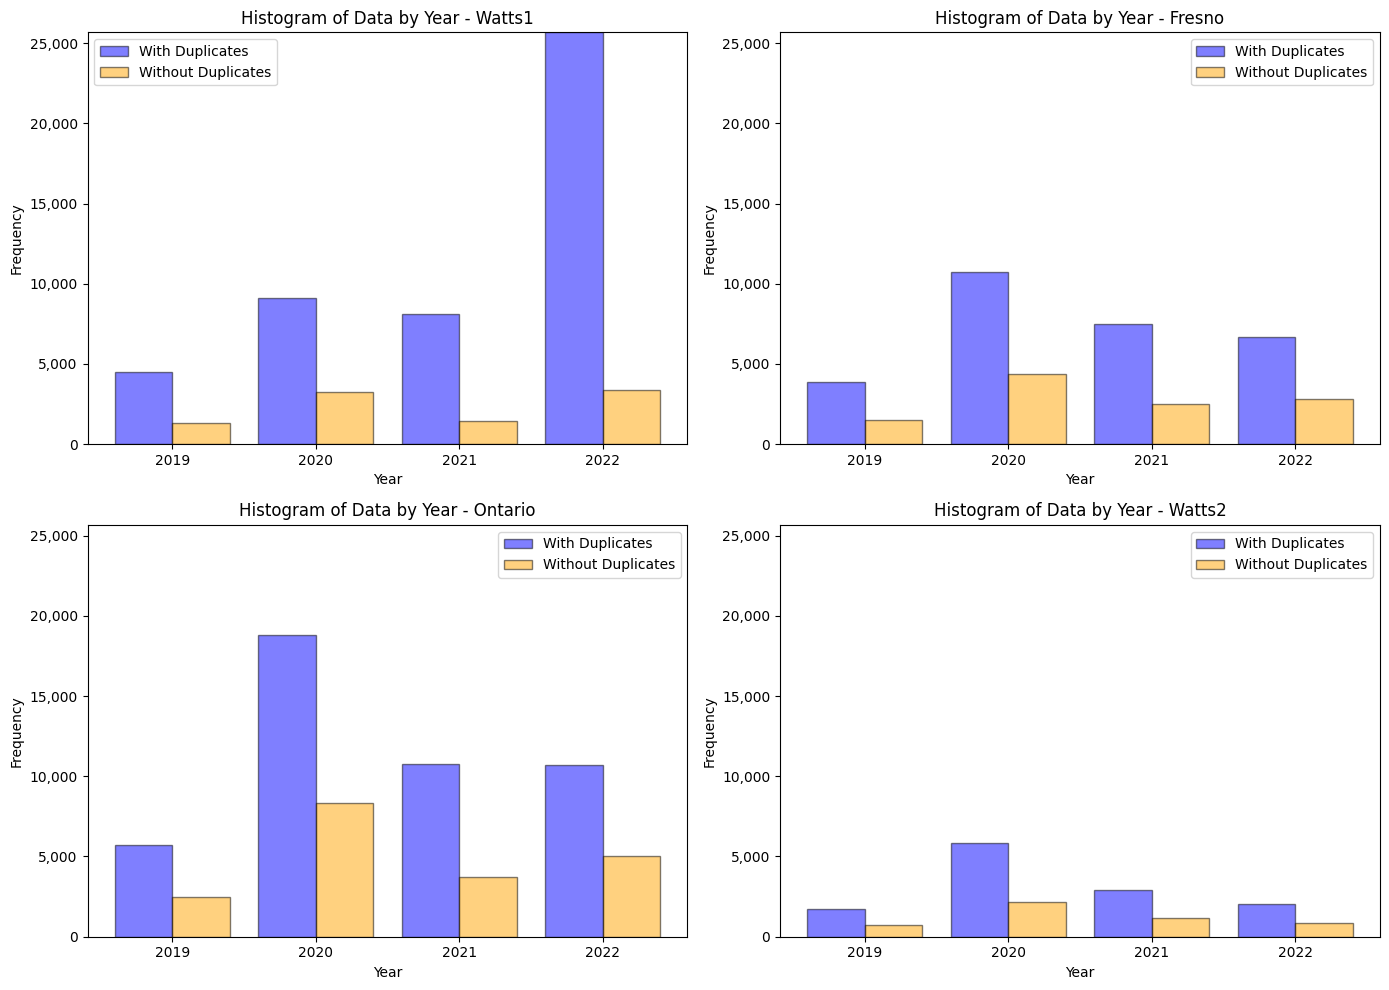

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is already defined

# Convert 'dt' column to datetime
df['dt'] = pd.to_datetime(df['dt'])

# Remove duplicates based on 'pid' column
df_no_duplicates = df.drop_duplicates(subset='pid')

# Get unique regions
unique_regions = df['region'].dropna().unique()

# Define bins for years
bins = range(df['dt'].dt.year.min(), df['dt'].dt.year.max() + 1)

# Initialize a dictionary to store the counts
data_summary = {
    'Region': [],
    'Year': [],
    'With Duplicates': [],
    'Without Duplicates': []
}

# Populate the dictionary with counts
for region in unique_regions:
    region_data_with_duplicates = df[df['region'] == region]
    region_data_without_duplicates = df_no_duplicates[df_no_duplicates['region'] == region]
    
    for year in bins:
        data_summary['Region'].append(region)
        data_summary['Year'].append(year)
        data_summary['With Duplicates'].append(region_data_with_duplicates[region_data_with_duplicates['dt'].dt.year == year].shape[0])
        data_summary['Without Duplicates'].append(region_data_without_duplicates[region_data_without_duplicates['dt'].dt.year == year].shape[0])

# Convert the dictionary to a DataFrame
summary_df = pd.DataFrame(data_summary)

# Display the summary DataFrame
print(summary_df)

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define width for histograms
width = 0.4

# Determine the maximum y-axis limit for standardization
max_y = max(summary_df['With Duplicates'].max(), summary_df['Without Duplicates'].max())

# Plot side-by-side bar charts for each region
for i, region in enumerate(unique_regions):
    region_data = summary_df[summary_df['Region'] == region]
    
    years = region_data['Year']
    with_duplicates = region_data['With Duplicates']
    without_duplicates = region_data['Without Duplicates']
    
    # Plot histograms side-by-side
    axes[i].bar(years - width/2, with_duplicates, width=width, alpha=0.5, label='With Duplicates', color='blue', edgecolor='black')
    axes[i].bar(years + width/2, without_duplicates, width=width, alpha=0.5, label='Without Duplicates', color='orange', edgecolor='black')
    
    # Set titles and labels
    axes[i].set_title(f'Histogram of Data by Year - {region}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    
    # Format y-axis with commas
    axes[i].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
    # Set x-axis to show whole numbers
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Standardize y-axis
    axes[i].set_ylim(0, max_y)

# Adjust layout
plt.tight_layout()
plt.show()

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df and df_no_duplicates are already defined

# Get unique regions
unique_regions = df['region'].dropna().unique()

# Define bins for years
bins = range(df['year'].min(), df['year'].max() + 1)

# Initialize a dictionary to store the counts
data_summary = {
    'Region': [],
    'Year': [],
    'With Duplicates': [],
    'Without Duplicates': []
}

# Populate the dictionary with counts
for region in unique_regions:
    region_data_with_duplicates = df[df['region'] == region]
    region_data_without_duplicates = df_no_duplicates[df_no_duplicates['region'] == region]
    
    for year in bins:
        data_summary['Region'].append(region)
        data_summary['Year'].append(year)
        data_summary['With Duplicates'].append(region_data_with_duplicates[region_data_with_duplicates['year'] == year].shape[0])
        data_summary['Without Duplicates'].append(region_data_without_duplicates[region_data_without_duplicates['year'] == year].shape[0])

# Convert the dictionary to a DataFrame
summary_df = pd.DataFrame(data_summary)


# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define width for histograms
width = 0.4

# Determine the maximum y-axis limit for standardization
max_y = max(summary_df['With Duplicates'].max(), summary_df['Without Duplicates'].max())

# Plot side-by-side bar charts for each region
for i, region in enumerate(unique_regions):
    region_data = summary_df[summary_df['Region'] == region]
    
    years = region_data['Year']
    with_duplicates = region_data['With Duplicates']
    without_duplicates = region_data['Without Duplicates']
    
    # Plot histograms side-by-side
    axes[i].bar(years - width/2, with_duplicates, width=width, alpha=0.5, label='With Duplicates', color='blue', edgecolor='black')
    axes[i].bar(years + width/2, without_duplicates, width=width, alpha=0.5, label='Without Duplicates', color='orange', edgecolor='black')
    
    # Set titles and labels
    axes[i].set_title(f'Histogram of Data by Year - {region}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    
    # Format y-axis with commas
    axes[i].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
    # Set x-axis to show whole numbers
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Standardize y-axis
    axes[i].set_ylim(0, max_y)

# Adjust layout
plt.tight_layout()
plt.show()

# Display the summary DataFrame using pandas
summary_df


KeyError: 'year'

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df and df_no_duplicates are already defined

# Get unique regions
unique_regions = df['region'].dropna().unique()

# Define bins for years
bins = range(df['year'].min(), df['year'].max() + 1)

# Initialize a dictionary to store the counts
data_summary = {
    'Region': [],
    'Year': [],
    'With Duplicates': [],
    'Without Duplicates': []
}

# Populate the dictionary with counts
for region in unique_regions:
    region_data_with_duplicates = df[df['region'] == region]
    region_data_without_duplicates = df_no_duplicates[df_no_duplicates['region'] == region]
    
    for year in bins:
        data_summary['Region'].append(region)
        data_summary['Year'].append(year)
        data_summary['With Duplicates'].append(region_data_with_duplicates[region_data_with_duplicates['year'] == year].shape[0])
        data_summary['Without Duplicates'].append(region_data_without_duplicates[region_data_without_duplicates['year'] == year].shape[0])

# Convert the dictionary to a DataFrame
summary_df = pd.DataFrame(data_summary)

# Display the summary DataFrame using pandas
summary_df

# Save the deduplicated data to a new CSV file
df_no_duplicates.to_csv('craigslist_data_no_duplicates.csv', index=False)

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define width for histograms
width = 0.4

# Determine the maximum y-axis limit for standardization
max_y = max(summary_df['With Duplicates'].max(), summary_df['Without Duplicates'].max())

# Plot side-by-side bar charts for each region
for i, region in enumerate(unique_regions):
    region_data = summary_df[summary_df['Region'] == region]
    
    years = region_data['Year']
    with_duplicates = region_data['With Duplicates']
    without_duplicates = region_data['Without Duplicates']
    
    # Plot histograms side-by-side
    axes[i].bar(years - width/2, with_duplicates, width=width, alpha=0.5, label='With Duplicates', color='blue', edgecolor='black')
    axes[i].bar(years + width/2, without_duplicates, width=width, alpha=0.5, label='Without Duplicates', color='orange', edgecolor='black')
    
    # Set titles and labels
    axes[i].set_title(f'Histogram of Data by Year - {region}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    
    # Format y-axis with commas
    axes[i].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
    # Set x-axis to show whole numbers
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Standardize y-axis
    axes[i].set_ylim(0, max_y)

# Adjust layout
plt.tight_layout()
plt.show()

KeyError: 'year'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is already defined

# Convert 'dt' column to datetime
df['dt'] = pd.to_datetime(df['dt'])

# Remove duplicates based on 'pid' column
df_no_duplicates = df.drop_duplicates(subset='pid')

# Filter data for January and August
df_filtered = df[df['dt'].dt.month.isin([1, 8])]
df_no_duplicates_filtered = df_no_duplicates[df_no_duplicates['dt'].dt.month.isin([1, 8])]

# Get unique regions
unique_regions = df_filtered['region'].dropna().unique()

# Define bins for years
bins = range(df_filtered['dt'].dt.year.min(), df_filtered['dt'].dt.year.max() + 1)

# Initialize a dictionary to store the counts
data_summary = {
    'Region': [],
    'Year': [],
    'With Duplicates': [],
    'Without Duplicates': []
}

# Populate the dictionary with counts
for region in unique_regions:
    region_data_with_duplicates = df_filtered[df_filtered['region'] == region]
    region_data_without_duplicates = df_no_duplicates_filtered[df_no_duplicates_filtered['region'] == region]
    
    for year in bins:
        data_summary['Region'].append(region)
        data_summary['Year'].append(year)
        data_summary['With Duplicates'].append(region_data_with_duplicates[region_data_with_duplicates['dt'].dt.year == year].shape[0])
        data_summary['Without Duplicates'].append(region_data_without_duplicates[region_data_without_duplicates['dt'].dt.year == year].shape[0])

# Convert the dictionary to a DataFrame
summary_df = pd.DataFrame(data_summary)

# Save the deduplicated data to a new CSV file
df_no_duplicates_filtered.to_csv('craigslist_data_no_duplicates_jan_aug.csv', index=False)

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define width for histograms
width = 0.4

# Determine the maximum y-axis limit for standardization
max_y = max(summary_df['With Duplicates'].max(), summary_df['Without Duplicates'].max())

# Plot side-by-side bar charts for each region
for i, region in enumerate(unique_regions):
    region_data = summary_df[summary_df['Region'] == region]
    
    years = region_data['Year']
    with_duplicates = region_data['With Duplicates']
    without_duplicates = region_data['Without Duplicates']
    
    # Plot histograms side-by-side
    axes[i].bar(years - width/2, with_duplicates, width=width, alpha=0.5, label='With Duplicates', color='blue', edgecolor='black')
    axes[i].bar(years + width/2, without_duplicates, width=width, alpha=0.5, label='Without Duplicates', color='orange', edgecolor='black')
    
    # Set titles and labels
    axes[i].set_title(f'Histogram of Data by Year - {region}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    
    # Format y-axis with commas
    axes[i].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
    # Set x-axis to show whole numbers
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Standardize y-axis
    axes[i].set_ylim(0, max_y)

# Adjust layout
plt.tight_layout()
plt.show()

# Display the summary DataFrame using pandas
summary_df

NameError: name 'df' is not defined

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df and df_no_duplicates are already defined

# Convert 'dt' column to datetime
df['dt'] = pd.to_datetime(df['dt'])
df_no_duplicates['dt'] = pd.to_datetime(df_no_duplicates['dt'])

# Filter data for January and August
df_filtered = df[df['dt'].dt.month.isin([1, 8])]
df_no_duplicates_filtered = df_no_duplicates[df_no_duplicates['dt'].dt.month.isin([1, 8])]

# Define the regions of interest
regions_of_interest = ['Fresno', 'Ontario', 'Watts1', 'Watts2']

# Initialize a dictionary to store the results
results = {
    'Region': [],
    'Total Listings 2020': [],
    'Total Listings 2022': [],
    '% Change Listings': []
}

# Calculate the metrics for each region
for region in regions_of_interest:
    for year in [2020, 2022]:
        region_data = df_no_duplicates_filtered[(df_no_duplicates_filtered['region'] == region) & (df_no_duplicates_filtered['dt'].dt.year == year)]
        
        total_listings = region_data.shape[0]
        
        results['Region'].append(region)
        if year == 2020:
            results['Total Listings 2020'].append(total_listings)
        else:
            results['Total Listings 2022'].append(total_listings)

# Calculate percentage changes
for i in range(len(regions_of_interest)):
    total_listings_2020 = results['Total Listings 2020'][i]
    total_listings_2022 = results['Total Listings 2022'][i]
    
    results['% Change Listings'].append(((total_listings_2022 - total_listings_2020) / total_listings_2020) * 100)

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)

# Save the deduplicated data to a new CSV file
df_no_duplicates_filtered.to_csv('craigslist_data_no_duplicates_jan_aug.csv', index=False)

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define width for histograms
width = 0.4

# Determine the maximum y-axis limit for standardization
max_y = max(results_df['Total Listings 2020'].max(), results_df['Total Listings 2022'].max())

# Plot side-by-side bar charts for each region
for i, region in enumerate(regions_of_interest):
    region_data = results_df[results_df['Region'] == region]
    
    years = [2020, 2022]
    total_listings = [region_data['Total Listings 2020'].values[0], region_data['Total Listings 2022'].values[0]]
    
    # Plot histograms side-by-side
    axes[i].bar(years, total_listings, width=width, alpha=0.5, label='Total Listings', color='blue', edgecolor='black')
    
    # Set titles and labels
    axes[i].set_title(f'Histogram of Total Listings by Year - {region}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Listings')
    axes[i].legend()
    
    # Format y-axis with commas
    axes[i].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
    # Set x-axis to show whole numbers
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Standardize y-axis
    axes[i].set_ylim(0, max_y)

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\hikou\AppData\Local\Temp\ipykernel_15088\481201591.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['dt'] = pd.to_datetime(df_no_duplicates['dt'])


ValueError: All arrays must be of the same length

In [1]:
import pandas as pd

# Assuming df is already defined

# Convert 'dt' column to datetime
df['dt'] = pd.to_datetime(df['dt'])

# Remove duplicates based on 'pid' column
df_no_duplicates = df.drop_duplicates(subset='pid')

# Filter data for January and August
df_filtered = df[df['dt'].dt.month.isin([1, 8])]
df_no_duplicates_filtered = df_no_duplicates[df_no_duplicates['dt'].dt.month.isin([1, 8])]

# Define the regions of interest
regions_of_interest = ['Fresno', 'Ontario', 'Watts1', 'Watts2']

# Initialize a dictionary to store the results
results = {
    'Region': [],
    'Total Listings 2020': [],
    'Total Listings 2022': [],
    '% Change Listings': []
}

# Calculate the metrics for each region
for region in regions_of_interest:
    results['Region'].append(region)
    
    total_listings_2020 = df_no_duplicates_filtered[(df_no_duplicates_filtered['region'] == region) & (df_no_duplicates_filtered['dt'].dt.year == 2020)].shape[0]
    total_listings_2022 = df_no_duplicates_filtered[(df_no_duplicates_filtered['region'] == region) & (df_no_duplicates_filtered['dt'].dt.year == 2022)].shape[0]
    
    results['Total Listings 2020'].append(total_listings_2020)
    results['Total Listings 2022'].append(total_listings_2022)
    
    # Calculate percentage change
    if total_listings_2020 > 0:
        percent_change = ((total_listings_2022 - total_listings_2020) / total_listings_2020) * 100
    else:
        percent_change = None  # Handle division by zero if there are no listings in 2020
    
    results['% Change Listings'].append(percent_change)

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)

# Save the deduplicated data to a new CSV file
df_no_duplicates_filtered.to_csv('craigslist_data_no_duplicates_jan_aug.csv', index=False)

NameError: name 'df' is not defined

    Region  Total Listings 2020  Total Listings 2022  % Change Listings
0   Fresno                 2441                 1525         -37.525604
1  Ontario                 4105                 2678         -34.762485
2   Watts1                 2466                 3682          49.310624
3   Watts2                 1331                  601         -54.845980


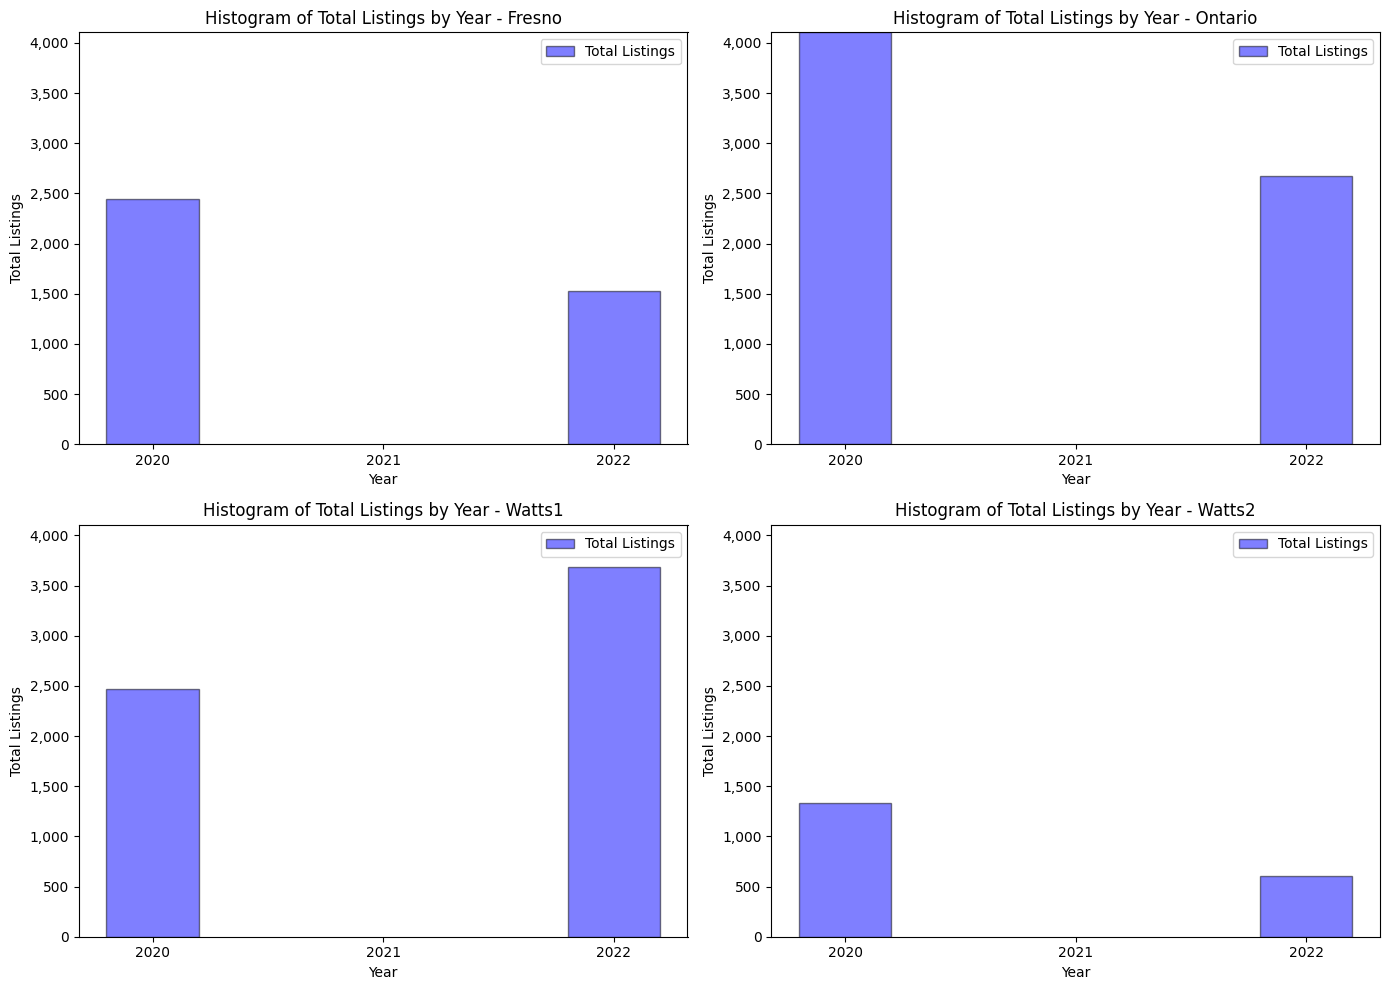

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is already defined

# Convert 'dt' column to datetime
df['dt'] = pd.to_datetime(df['dt'])

# Filter data for January and August
df_filtered = df[df['dt'].dt.month.isin([1, 8])]

# Define the regions of interest
regions_of_interest = ['Fresno', 'Ontario', 'Watts1', 'Watts2']

# Initialize a dictionary to store the results
results_comparison = {
    'Region': [],
    'Total Listings 2020': [],
    'Total Listings 2022': [],
    '% Change Listings': []
}

# Calculate the metrics for each region
for region in regions_of_interest:
    results_comparison['Region'].append(region)
    
    total_listings_2020 = df_filtered[(df_filtered['region'] == region) & (df_filtered['dt'].dt.year == 2020)].shape[0]
    total_listings_2022 = df_filtered[(df_filtered['region'] == region) & (df_filtered['dt'].dt.year == 2022)].shape[0]
    
    results_comparison['Total Listings 2020'].append(total_listings_2020)
    results_comparison['Total Listings 2022'].append(total_listings_2022)
    
    # Calculate percentage change
    if total_listings_2020 > 0:
        percent_change = ((total_listings_2022 - total_listings_2020) / total_listings_2020) * 100
    else:
        percent_change = None  # Handle division by zero if there are no listings in 2020
    
    results_comparison['% Change Listings'].append(percent_change)

# Convert the results dictionary to a DataFrame
results_comparison_df = pd.DataFrame(results_comparison)

# Display the results DataFrame
print(results_comparison_df)

# Save the filtered data to a new CSV file
df_filtered.to_csv('craigslist_data_jan_aug.csv', index=False)

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define width for histograms
width = 0.4

# Determine the maximum y-axis limit for standardization
max_y = max(results_comparison_df['Total Listings 2020'].max(), results_comparison_df['Total Listings 2022'].max())

# Plot side-by-side bar charts for each region
for i, region in enumerate(regions_of_interest):
    region_data = results_comparison_df[results_comparison_df['Region'] == region]
    
    years = [2020, 2022]
    total_listings = [region_data['Total Listings 2020'].values[0], region_data['Total Listings 2022'].values[0]]
    
    # Plot histograms side-by-side
    axes[i].bar(years, total_listings, width=width, alpha=0.5, label='Total Listings', color='blue', edgecolor='black')
    
    # Set titles and labels
    axes[i].set_title(f'Histogram of Total Listings by Year - {region}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Listings')
    axes[i].legend()
    
    # Format y-axis with commas
    axes[i].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
    # Set x-axis to show whole numbers
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Standardize y-axis
    axes[i].set_ylim(0, max_y)

# Adjust layout
plt.tight_layout()
plt.show()